# Steiner Trees on Road Maps
This example retrieves a graph from [OpenStreetMap](https://www.openstreetmap.org) via the [osmnx](https://osmnx.readthedocs.io) package.
A shortest tree connecting a set of randomly chosen terminals is then found by computing a minimum weight [Steiner tree](https://en.wikipedia.org/wiki/Steiner_tree_problem#Steiner_tree_in_graphs_and_variants).

## Imports

In [8]:
import random

import networkx as nx

import osmnx as ox
import pyproj

from graphilp.imports import networkx as imp_nx
from graphilp.network import steiner_linear_tightened as stp
from graphilp.network.heuristics import steiner_metric_closure as smc



Use [Gauss-Krüger 3](https://georepository.com/crs_31467/DHDN-3-degree-Gauss-Kruger-zone-3.html) as coordinate system

In [9]:
crs = pyproj.crs.CRS('epsg:31467')

In [10]:
place = 'Oberkassel, Düsseldorf, Deutschland'

# road network of suburb (converted to Gauss-Krüger 3)
G = ox.project_graph(ox.graph_from_place(place, network_type='walk'), to_crs=crs)

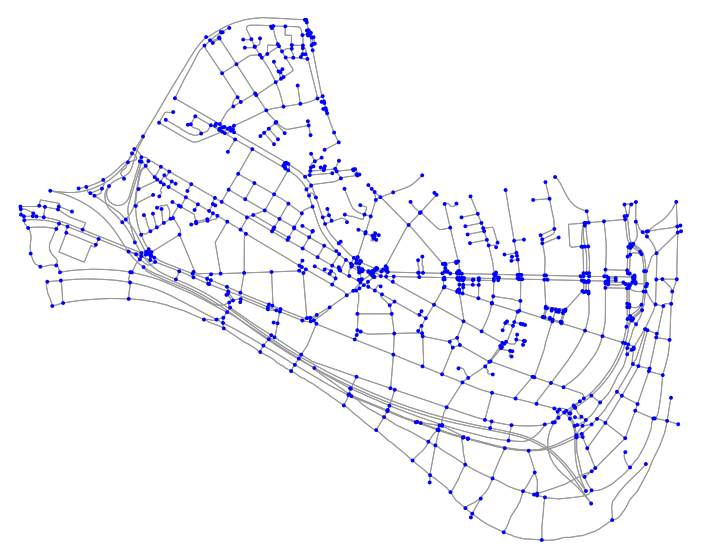

In [11]:
# draw the road map
ox.plot_graph(G, figsize=(14, 10),
    bgcolor='#FFF',
    node_color='b');

# Choose terminals

In [12]:
node_list = list(G.nodes())

In [13]:
# choose num_terminals random terminals
num_terminals = 5

In [14]:
terminals = [node_list[random.randint(0, len(node_list))] for n in range(num_terminals)]

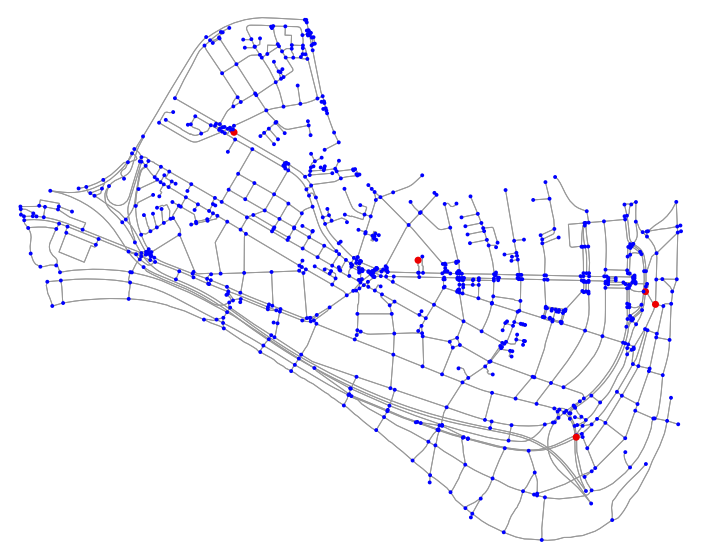

In [15]:
# draw road map and terminals
ox.plot_graph(G, figsize=(14, 10),
    bgcolor='#FFF',
    node_color=['#ED0000' if n in terminals else '#00F' for n in node_list],
    node_size=[50 if n in terminals else 15 for n in node_list]);

## Set up and run optimisation problem

In [16]:
# transform input into an undirected graph
G_undirected = nx.Graph(G)

In [17]:
# import to GraphILP API
optG = imp_nx.read(G_undirected)

In [18]:
# find a heuristic solution
warmstart, lower_bound = smc.get_heuristic(optG, terminals)

In [19]:
# set up model and warmstart
m = stp.create_model(optG, terminals, weight='length', warmstart=warmstart)

Academic license - for non-commercial use only - expires 2021-06-05
Using license file /home/addimator/gurobi.lic


In [ ]:
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 6 physical cores, 6 logical processors, using up to 6 threads
Optimize a model with 18063 rows, 4394 columns and 67397 nonzeros
Model fingerprint: 0xf97fe341
Variable types: 0 continuous, 4394 integer (3471 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [5e-01, 2e+03]
  Bounds range     [1e+00, 9e+02]
  RHS range        [1e+00, 2e+03]

Loaded user MIP start with objective 2694.14

Presolve removed 8163 rows and 166 columns
Presolve time: 0.11s
Presolved: 9900 rows, 4228 columns, 36000 nonzeros
Variable types: 0 continuous, 4228 integer (3305 binary)

Root relaxation: objective 3.757133e+02, 2132 iterations, 0.14 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  375.71325    0   42 2694.13700  375.71325  86.1%     -    0s
     0     0  376.65150    0   42 26

## Visualise solution

In [ ]:
# extract solution
solution = stp.extract_solution(optG, m)

In [ ]:
# draw road map with terminals and solution

In [ ]:
edge_colors = ['#ED0000' if (u,v) in solution or (v, u) in solution else '#AAA' for u, v in G.edges()]
edge_widths = [3 if (u,v) in solution else 1 for u, v in G.edges()]

In [ ]:
ox.plot_graph(G, figsize=(14, 10),
    bgcolor='#FFF',
    node_color=['#ED0000' if n in terminals else '#00F' for n in node_list],
    node_size=[75 if n in terminals else 15 for n in node_list],
             edge_color=edge_colors, edge_linewidth=edge_widths);